<a href="https://colab.research.google.com/github/vncprado/visual-tactile_experiments/blob/main/Modelo_VT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Visual Tactile
=========================

This notebook contains code for classification of objects on sensor data from five steps over two points during manipulation tasks

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.0MB/s 
     |████████████████████████████████| 174kB 21.4MB/s 
     |████████████████████████████████| 1.4MB 20.1MB/s 
     |████████████████████████████████| 112kB 42.6MB/s 
     |████████████████████████████████| 256kB 21.2MB/s 
     |████████████████████████████████| 2.0MB 36.4MB/s 
     |████████████████████████████████| 276kB 34.9MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 6.8MB 40.8MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 14.2MB 198kB/s 
     |████████████████████████████████| 1.7MB 34.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 645kB 23.4MB/s 
     |████████████████████████████████| 112kB 32.5MB/s

In [ ]:
import numpy as np
import pandas as pd
from pycaret.classification import *

Let's import our data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive"

Mounted at /content/drive


In [ ]:
df_old = pd.read_csv('/content/drive/MyDrive/dataframe_visualtactile_3.csv', index_col=[0])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dfexp10.csv', index_col=[0])

In [ ]:
#Split x e y
y_old = df_old['Target']
X_old = df_old.drop(columns =['Target'])
targets = {k: v for k, v in enumerate(y_old.unique())}
print(targets)

X_old=X_old.reset_index(drop=True)
X_old=X_old.to_numpy()
y_old=y_old.reset_index(drop=True)
y_old=y_old.to_numpy()

from sklearn import preprocessing
X_old = preprocessing.scale(X_old)

{0: 'Cheez', 1: 'Coffeecup', 2: 'Cola', 3: 'Crisp', 4: 'Latte', 5: 'Scrub', 6: 'Suger', 7: 'Tomato', 8: 'Water', 9: 'Yellow'}


In [ ]:
#Split x e y
y = df['Target']
X = df.drop(columns =['Target'])
targets = {k: v for k, v in enumerate(y.unique())}
print(targets)

X=X.reset_index(drop=True)
X=X.to_numpy()
y=y.reset_index(drop=True)
y=y.to_numpy()

from sklearn import preprocessing
X = preprocessing.scale(X)

{0: 'Cheez', 1: 'Coffeecup', 2: 'Cola', 3: 'Crisp', 4: 'Latte', 5: 'Scrub', 6: 'Suger', 7: 'Tomato', 8: 'Water', 9: 'Yellow'}


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def create_model_list():
    models_list = []
    # ExtraTrees Classifier
    clf = ExtraTreesClassifier(n_estimators=50,
                                   max_depth=None,
                                   min_samples_split=2,
                                   random_state=0)#.fit(X_train, y_train)
    models_list.append([clf, "extra-trees", "Extra-trees Classifier"])

    # Random Forest 100
    clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
    clf#.fit(X_train, y_train)
    models_list.append([clf, "random-forest-100", "Random Forest (100)"])

    # Random Forest 50
    clf = RandomForestClassifier(n_estimators=50, max_depth=30, random_state=0)
    clf#.fit(X_train, y_train)
    models_list.append([clf, "random-forest-50", "Random Forest (50)"])

    # Ridge Classifier
    clf = RidgeClassifier(alpha=40.0, 
                              fit_intercept=True, 
                              normalize=False, 
                              copy_X=True, 
                              max_iter=None, 
                              tol=0.001, 
                              class_weight=None, 
                              solver='auto', 
                              random_state=0)#.fit(X_train, y_train)
    models_list.append([clf, "ridge", "Ridge Classifier"])

    # SVM
    clf = svm.SVC(kernel='linear', C=1)
    models_list.append([clf, "SVM", "Support Vector Machines"])
    
    # KNN
    clf = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform', 
                                   algorithm='auto', 
                                   leaf_size=30, 
                                   p=4, 
                                   metric='minkowski', 
                                   metric_params=None, 
                                   n_jobs=1)#.fit(X_train, y_train)
    models_list.append([clf, "knn", "K-Nearest Neighbors"])

    # MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(100,100,), random_state=0)#.fit(X_train, y_train)
    models_list.append([clf, "mlp", "MLP Classifier"])
    
    return models_list

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict    
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import QuadMesh
import matplotlib.dates as mdates
import matplotlib

In [ ]:
# Update with the latest code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# cross validate 5-fold
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

train_index_list = []
test_index_list = []
for train_index, test_index in cv.split(X, y):
    train_index_list.append(train_index)
    test_index_list.append(test_index)
# print(train_index_list)
# print(test_index_list)

In [ ]:
train_index_list_old = []
test_index_list_old = []
for train_index, test_index in cv.split(X_old, y_old):
    train_index_list_old.append(train_index)
    test_index_list_old.append(test_index)

In [ ]:
to_save = False
to_show = False
results_folder = 'results'

In [ ]:
def confusion_matrix_plot(y_true,
                          y_pred,
                          labels,
                          img_name="Confusion matrix",
                          title="Confusion matrix",
                          ymap=None,
                          figsize=(10,10),
                          to_save=False,
                          to_show=False):
    matplotlib.rcParams.update({'font.size': 13})
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap != None:
        #print("using ymap:", ymap)
        y_pred = [yi for yi in y_pred]
        y_true = [yi for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=0, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    nrows, ncols = cm.shape
    b = np.zeros((nrows+1,ncols+1))
    b[:-1,:-1] = cm
    annot = np.empty_like(b).astype(str)
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[0,i]
                annot[i, j] = '%.1f%%\n%d' % (p, c)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    for i in range(ncols):
        col_sum = 0
        for j in range(nrows):
            col_sum = col_sum + cm[j,i]
        annot[nrows,i] = col_sum
        b[nrows,i] = col_sum
        
    for i in range(nrows):
        row_sum = 0
        for j in range(ncols):
            row_sum = row_sum + cm[i,j]
        annot[i,ncols] = row_sum
        b[i,ncols] = row_sum
        
    sum_ok = 0
    sum_total = 0
    hits = np.array([b[i,i] for i in range(ncols)])
    total = np.array([b[nrows,i] for i in range(nrows)])
    hits = hits/total

    for i in range(ncols):
        sum_ok = sum_ok + b[i,i]
        sum_total = sum_total + b[nrows,i]
    
    p = sum_ok/sum_total.astype(float) * 100
    annot[nrows,ncols] = "%.2f%%" % (p)+"\n"+str(sum_total)
    
    for i in range(nrows):
        p = b[i,i]/b[i,ncols] * 100
        annot[i,ncols] = "{0:.2f}".format(p)+"%"+"\n"+str(annot[i,ncols])
        
    for i in range(ncols):
        p = b[i,i]/b[nrows,i] * 100
        annot[nrows,i] = "{0:.2f}".format(p)+"%"+"\n"+str(annot[nrows,i])
    
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax1 = sns.heatmap(b, annot=annot, cmap = plt.get_cmap("PuBu"), fmt='',
                      ax=ax, linecolor='k',linewidths=0.01, vmax=len(y_true)/len(labels))
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()
    for i in range(nrows):
        facecolors[i*(ncols+1)+ncols] = [0.5,0.5,0.5,1]
    for i in range(nrows*(ncols+1),(nrows+1)*(ncols+1)-1):
        facecolors[i] = [0.5,0.5,0.5,1]
    facecolors[(nrows+1)*(ncols+1)-1] = [0.8,0.8,0.8,1]
    
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticklabels(labels + ['recall'])
    ax.set_yticklabels(labels + ['precision'], rotation=90, va="center")
    return fig

extra-trees Extra-trees Classifier
Accuracy 0.7509803921568627 std 0.006678190731735819
Accuracy total 0.7509803921568627
Precision 0.7535369727526877
Recall 0.7454232804232804
F1 0.7477523839204135
F1 calculado 0.7494581673655575
random-forest-100 Random Forest (100)
Accuracy 0.7541176470588236 std 0.013731091294126743
Accuracy total 0.7541176470588236
Precision 0.7589311433973467
Recall 0.7483068783068784
F1 0.7510059931202552
F1 calculado 0.7535815665310805
random-forest-50 Random Forest (50)
Accuracy 0.7337254901960785 std 0.010105175471941289
Accuracy total 0.7337254901960785
Precision 0.7374087110654045
Recall 0.7271957671957672
F1 0.7297860861695863
F1 calculado 0.7322666308062797
ridge Ridge Classifier
Accuracy 0.4631372549019607 std 0.019067052205714866
Accuracy total 0.4631372549019608
Precision 0.46480923347459796
Recall 0.45402116402116405
F1 0.45174970996698505
F1 calculado 0.45935186690619983
SVM Support Vector Machines
Accuracy 0.504313725490196 std 0.030157857144675112


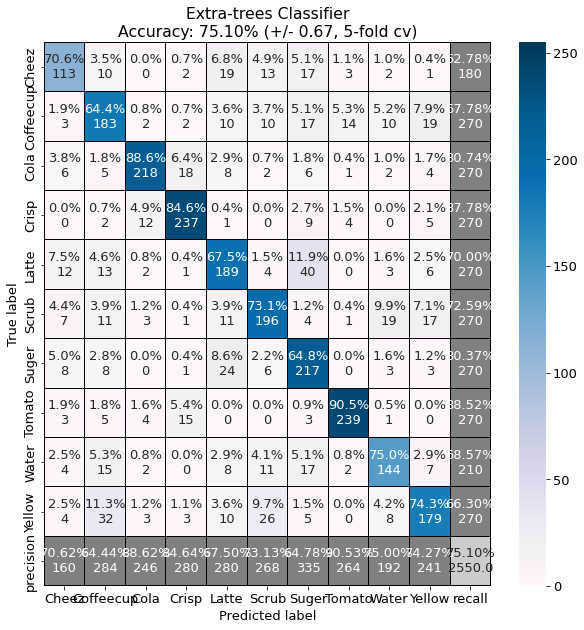

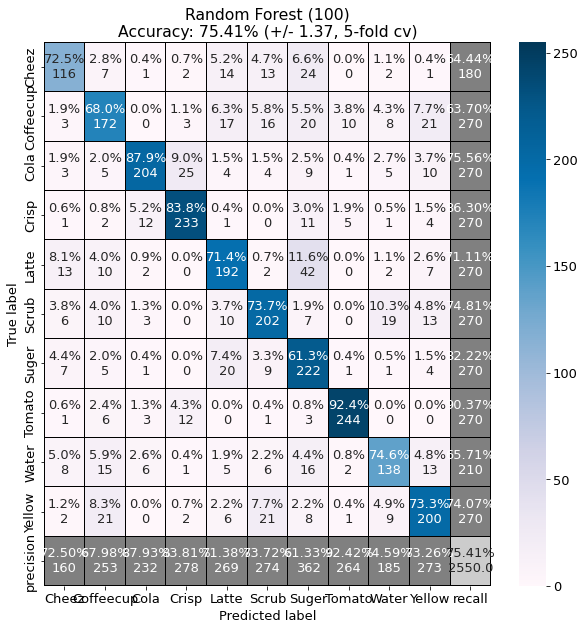

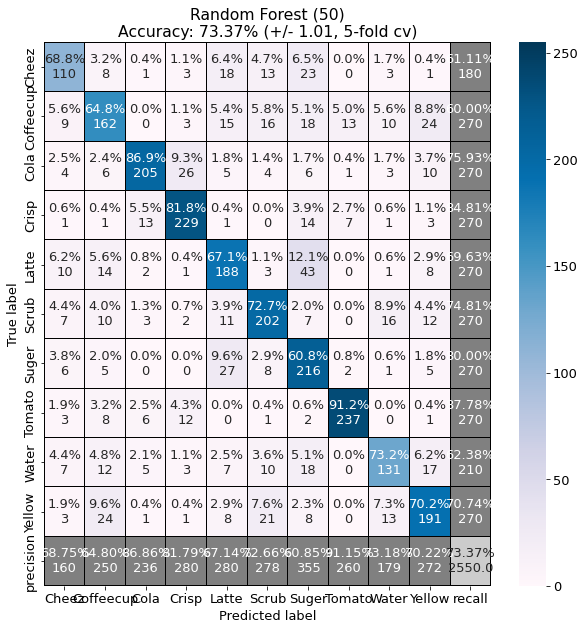

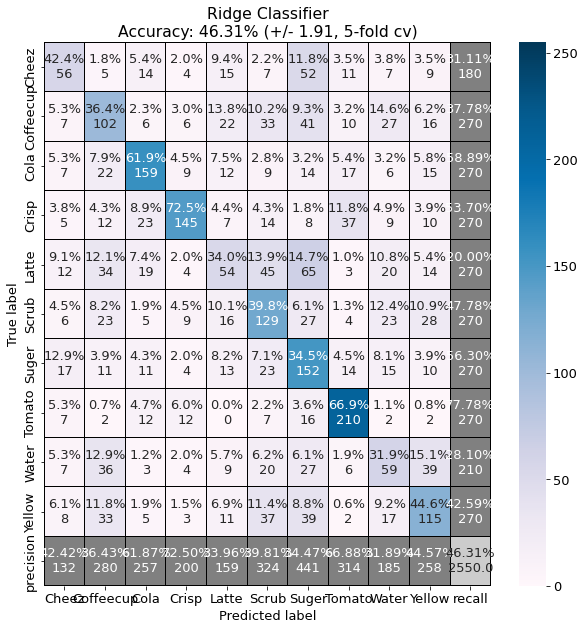

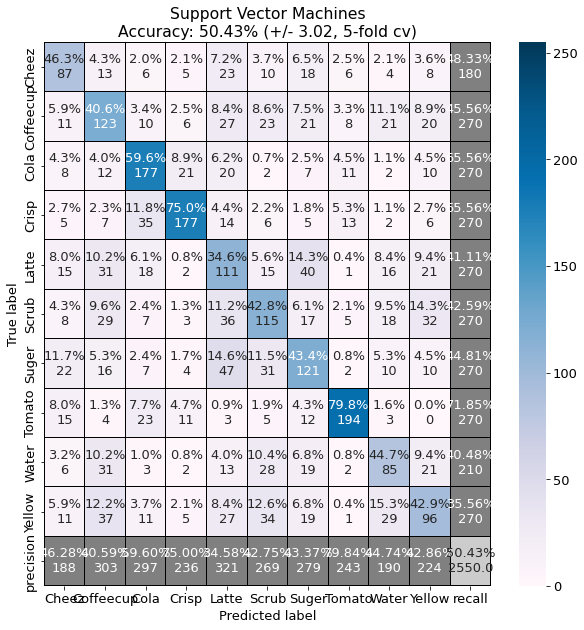

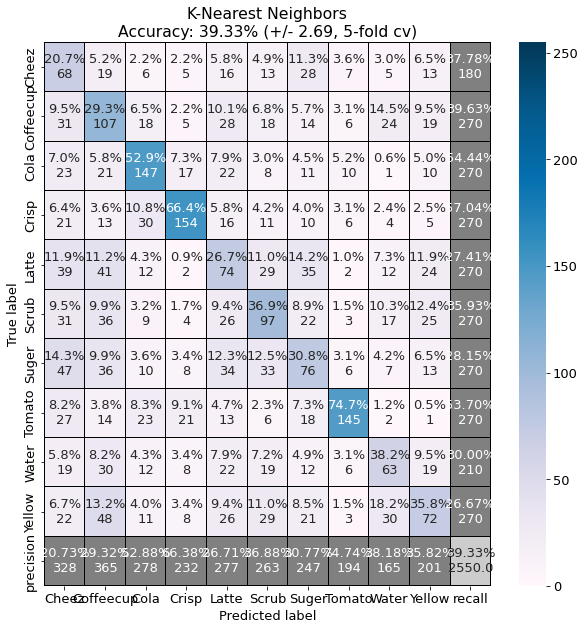

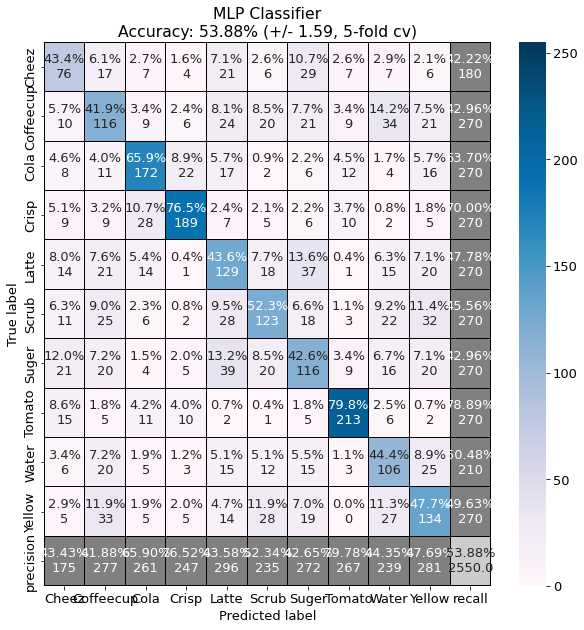

In [ ]:
models_list = create_model_list() 

for m in models_list:
    model = m[0]
    model_name = m[1]
    model_title = m[2]
    
    print(f"{model_name} {model_title}")
    y_pred_total = []
    y_test_total = []
    accuracy_list = []
    for fold_no in range(len(train_index_list)):
        train = X[train_index_list[fold_no],:] 
        test = X[test_index_list[fold_no],:]
        y_train = y[train_index_list[fold_no]] 
        y_test = y[test_index_list[fold_no]]
        
        model.fit(train, y_train)
        
        y_pred = model.predict(test)
        accuracy_list.append(accuracy_score(y_test, y_pred))
        y_pred_total += y_pred.tolist()
        y_test_total += y_test.tolist()
        
    p = precision_score(y_test_total, y_pred_total, average='macro')
    r = recall_score(y_test_total, y_pred_total, average='macro')
    f = f1_score(y_test_total, y_pred_total, average='macro')

    print("Accuracy", np.array(accuracy_list).mean(), "std", np.array(accuracy_list).std())
    print("Accuracy total", accuracy_score(y_test_total, y_pred_total))
    print("Precision", p)
    print("Recall", r)
    print("F1", f)
    
    print("F1 calculado", (2*p*r)/(p+r))
    
    scores = {"Accuracy": np.array(accuracy_list),
              "Precision": p,
              "Recall": r,
              "F1": f}
    m.append(scores) # m[3]
    accuracy_txt =  "Accuracy: %0.2f%% (+/- %0.2f, 5-fold cv)" % (scores["Accuracy"].mean() * 100, scores["Accuracy"].std() * 100)
    img_name=results_folder + model_name + "_single"
    fig_cm = confusion_matrix_plot(y_test_total,
                           y_pred_total,
                           [0,1,2,3,4,5,6,7,8,9],
                           ymap = targets,
                           img_name=img_name,
                           title=model_title + "\n" + accuracy_txt,
                           to_save=False,
                           to_show=True)
    if to_save:
      fig_cm.savefig(img_name+".svg", bbox_inches='tight')
      fig_cm.savefig(img_name+".png", bbox_inches='tight')
    if to_show:
      plt.tight_layout()
      plt.show()
      plt.close()

In [ ]:
from tabulate import tabulate
from numpy import around

def Sort(sub_li, column = 0, invert=True): 
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using third element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[column]) 
    if invert:
        return sub_li[::-1]
    return sub_li 

table_lines = []
for m in models_list:
    model_name = m[1]
    model_title = m[2]
    
    scores = m[3] 
    accuracy = scores['Accuracy']
    precision = scores['Precision']
    recall = scores['Recall']
    f1 = scores['F1']
    
    table_lines.append([model_title,
                        around(accuracy.mean()*100, 2),
                        around(accuracy.std()*100, 2),
                        around(f1, 4),
                        around(recall, 4),
                        around(precision, 4)])
    
table = Sort(table_lines, column=1)
table_header = ["Model", "Mean Accuracy", "Accuracy std", "F1", "Recall", "Precision"]
latex_table = tabulate(table, headers=table_header, tablefmt="latex")
print (latex_table)

if to_save:
    open(results_folder + "table-classification_single.txt","w").write(latex_table)


\begin{tabular}{lrrrrr}
\hline
 Model                   &   Mean Accuracy &   Accuracy std &     F1 &   Recall &   Precision \\
\hline
 Random Forest (100)     &           75.41 &           1.37 & 0.751  &   0.7483 &      0.7589 \\
 Extra-trees Classifier  &           75.1  &           0.67 & 0.7478 &   0.7454 &      0.7535 \\
 Random Forest (50)      &           73.37 &           1.01 & 0.7298 &   0.7272 &      0.7374 \\
 MLP Classifier          &           53.88 &           1.59 & 0.5354 &   0.5342 &      0.5381 \\
 Support Vector Machines &           50.43 &           3.02 & 0.5039 &   0.5014 &      0.5096 \\
 Ridge Classifier        &           46.31 &           1.91 & 0.4517 &   0.454  &      0.4648 \\
 K-Nearest Neighbors     &           39.33 &           2.69 & 0.395  &   0.3907 &      0.4124 \\
\hline
\end{tabular}


extra-trees Extra-trees Classifier
Accuracy 0.6768627450980391 std 0.015558301509707741
Accuracy total 0.6768627450980392
Precision 0.6703419469064166
Recall 0.6715608465608465
F1 0.6700219377128942
F1 calculado 0.6709508431479415
random-forest-100 Random Forest (100)
Accuracy 0.6780392156862745 std 0.011593525881642742
Accuracy total 0.6780392156862745
Precision 0.6772539345588294
Recall 0.6698941798941799
F1 0.6712795178394998
F1 calculado 0.6735539532794543
random-forest-50 Random Forest (50)
Accuracy 0.6647058823529411 std 0.01626387557123742
Accuracy total 0.6647058823529411
Precision 0.6622863337545432
Recall 0.6570370370370371
F1 0.6574446860765766
F1 calculado 0.659651242498833
ridge Ridge Classifier
Accuracy 0.3898039215686274 std 0.016470588235294112
Accuracy total 0.3898039215686275
Precision 0.3630725173135299
Recall 0.37103174603174605
F1 0.3481978498358999
F1 calculado 0.36700898431268386
SVM Support Vector Machines
Accuracy 0.43450980392156857 std 0.01978741303771429
Acc

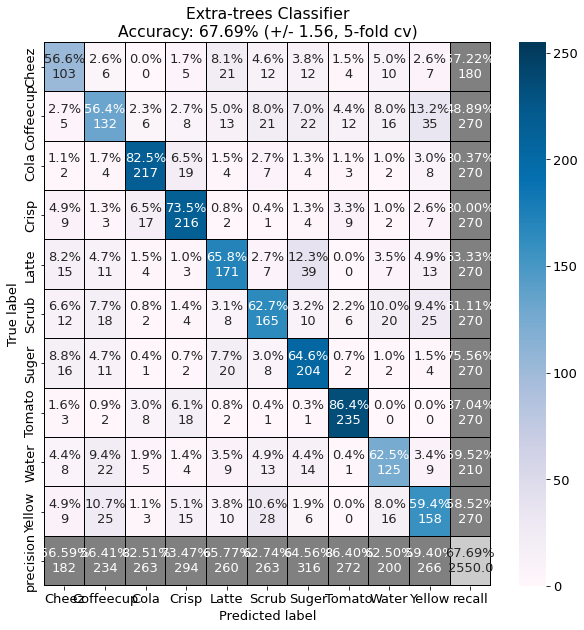

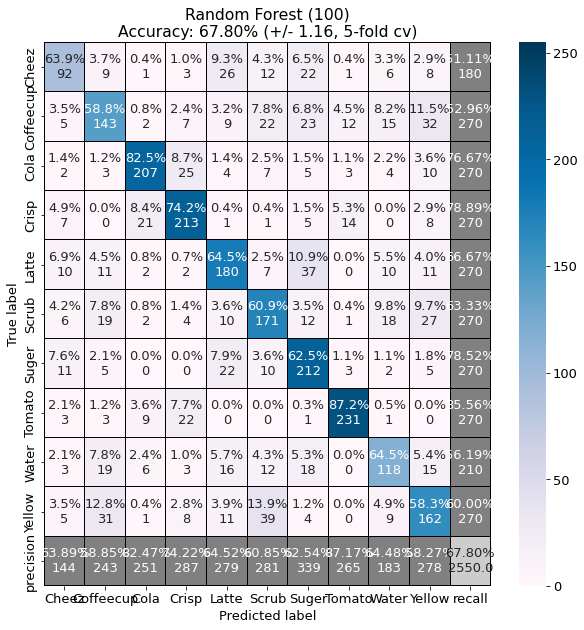

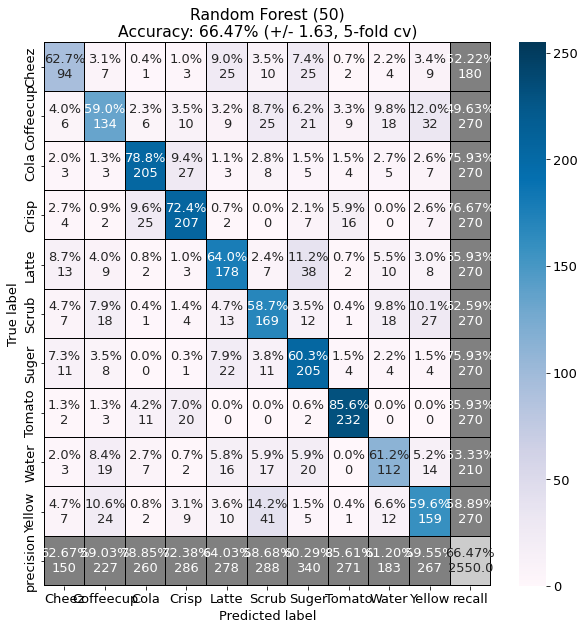

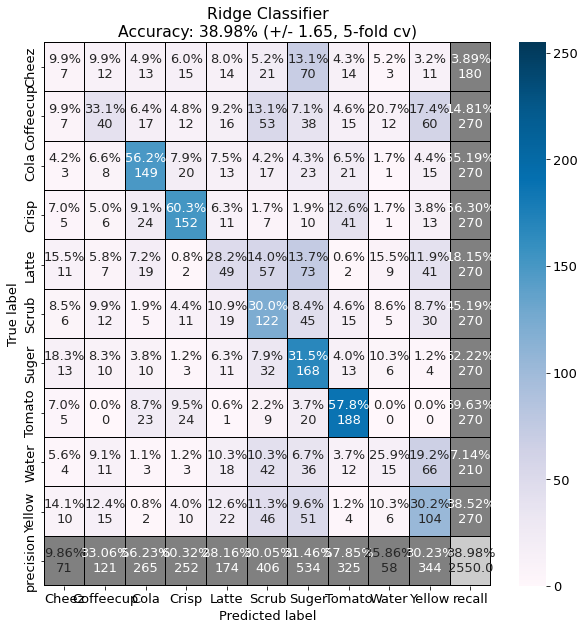

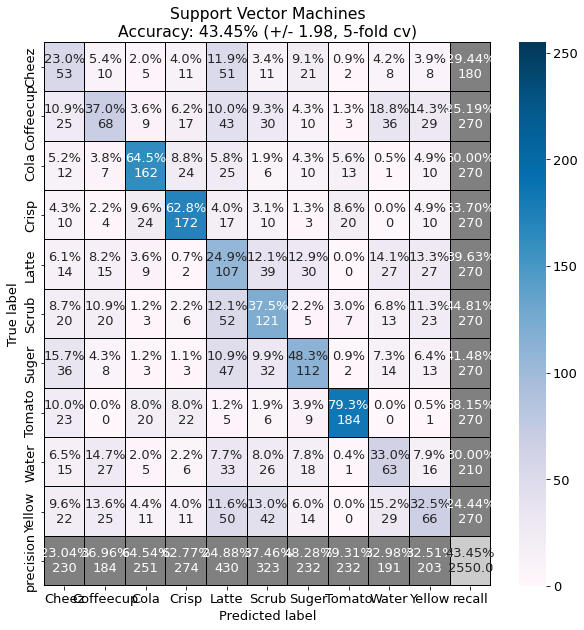

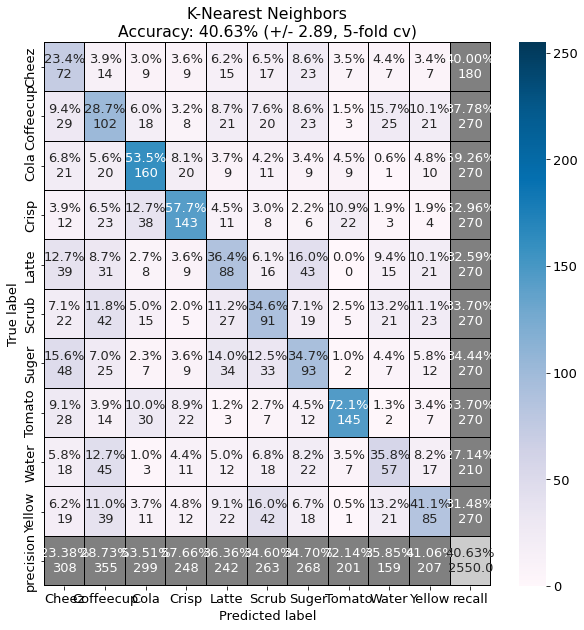

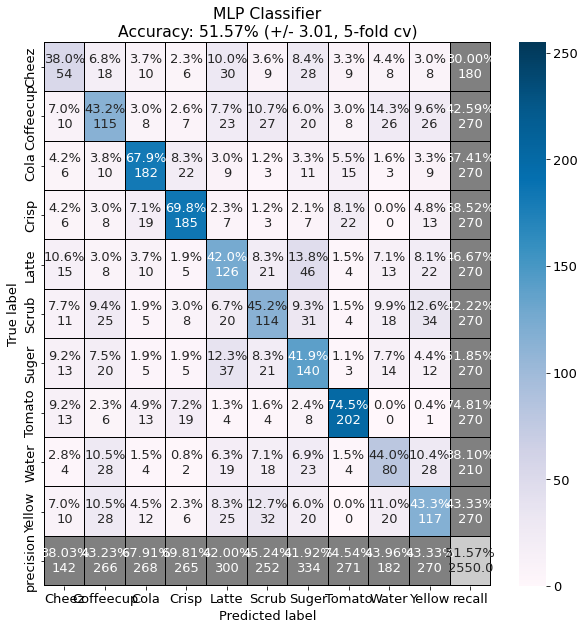

In [ ]:
models_list_old = create_model_list() 

for m in models_list_old:
    model = m[0]
    model_name = m[1]
    model_title = m[2]
    
    print(f"{model_name} {model_title}")
    y_pred_total = []
    y_test_total = []
    accuracy_list = []
    for fold_no in range(len(train_index_list_old)):
        train = X_old[train_index_list_old[fold_no],:] 
        test = X_old[test_index_list_old[fold_no],:]
        y_train = y[train_index_list_old[fold_no]] 
        y_test = y[test_index_list_old[fold_no]]
        
        model.fit(train, y_train)
        
        y_pred = model.predict(test)
        accuracy_list.append(accuracy_score(y_test, y_pred))
        y_pred_total += y_pred.tolist()
        y_test_total += y_test.tolist()
        
    p = precision_score(y_test_total, y_pred_total, average='macro')
    r = recall_score(y_test_total, y_pred_total, average='macro')
    f = f1_score(y_test_total, y_pred_total, average='macro')

    print("Accuracy", np.array(accuracy_list).mean(), "std", np.array(accuracy_list).std())
    print("Accuracy total", accuracy_score(y_test_total, y_pred_total))
    print("Precision", p)
    print("Recall", r)
    print("F1", f)
    
    print("F1 calculado", (2*p*r)/(p+r))
    
    scores = {"Accuracy": np.array(accuracy_list),
              "Precision": p,
              "Recall": r,
              "F1": f}
    m.append(scores) # m[3]
    accuracy_txt =  "Accuracy: %0.2f%% (+/- %0.2f, 5-fold cv)" % (scores["Accuracy"].mean() * 100, scores["Accuracy"].std() * 100)
    img_name=results_folder + model_name + "_single"
    fig_cm = confusion_matrix_plot(y_test_total,
                           y_pred_total,
                           [0,1,2,3,4,5,6,7,8,9],
                           ymap = targets,
                           img_name=img_name,
                           title=model_title + "\n" + accuracy_txt,
                           to_save=False,
                           to_show=True)
    if to_save:
      fig_cm.savefig(img_name+".svg", bbox_inches='tight')
      fig_cm.savefig(img_name+".png", bbox_inches='tight')
    if to_show:
      plt.tight_layout()
      plt.show()
      plt.close()

In [ ]:
table_lines_old = []
for m in models_list_old:
    model_name = m[1]
    model_title = m[2]
    
    scores = m[3] 
    accuracy = scores['Accuracy']
    precision = scores['Precision']
    recall = scores['Recall']
    f1 = scores['F1']
    
    table_lines_old.append([model_title,
                        around(accuracy.mean()*100, 2),
                        around(accuracy.std()*100, 2),
                        around(f1, 4),
                        around(recall, 4),
                        around(precision, 4)])
    
table = Sort(table_lines_old, column=1)
table_header = ["Model", "Mean Accuracy", "Accuracy std", "F1", "Recall", "Precision"]
latex_table = tabulate(table, headers=table_header, tablefmt="latex")
print (latex_table)

\begin{tabular}{lrrrrr}
\hline
 Model                   &   Mean Accuracy &   Accuracy std &     F1 &   Recall &   Precision \\
\hline
 Random Forest (100)     &           67.8  &           1.16 & 0.6713 &   0.6699 &      0.6773 \\
 Extra-trees Classifier  &           67.69 &           1.56 & 0.67   &   0.6716 &      0.6703 \\
 Random Forest (50)      &           66.47 &           1.63 & 0.6574 &   0.657  &      0.6623 \\
 MLP Classifier          &           51.57 &           3.01 & 0.5063 &   0.5055 &      0.51   \\
 Support Vector Machines &           43.45 &           1.98 & 0.4299 &   0.4269 &      0.4427 \\
 K-Nearest Neighbors     &           40.63 &           2.89 & 0.4048 &   0.4031 &      0.418  \\
 Ridge Classifier        &           38.98 &           1.65 & 0.3482 &   0.371  &      0.3631 \\
\hline
\end{tabular}


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
zipped_lists = zip(models_list, models_list_old)
sorted_pairs = sorted(zipped_lists, key = lambda x: x[0][3]['Accuracy'].mean(), reverse=True)

tuples = zip(*sorted_pairs)
models_list, models_list_old = [ list(tupli) for tupli in  tuples]

In [ ]:
models_names = [i[2] for i in models_list]
x_pos = np.arange(len(models_names))
models_accur = [around(i[3]['Accuracy'].mean()*100, 2) for i in models_list]
models_accur_old = [around(i[3]['Accuracy'].mean()*100, 2) for i in models_list_old]
models_std = [around(i[3]['Accuracy'].std()*100, 2) for i in models_list]
models_std_old = [around(i[3]['Accuracy'].std()*100, 2) for i in models_list_old]

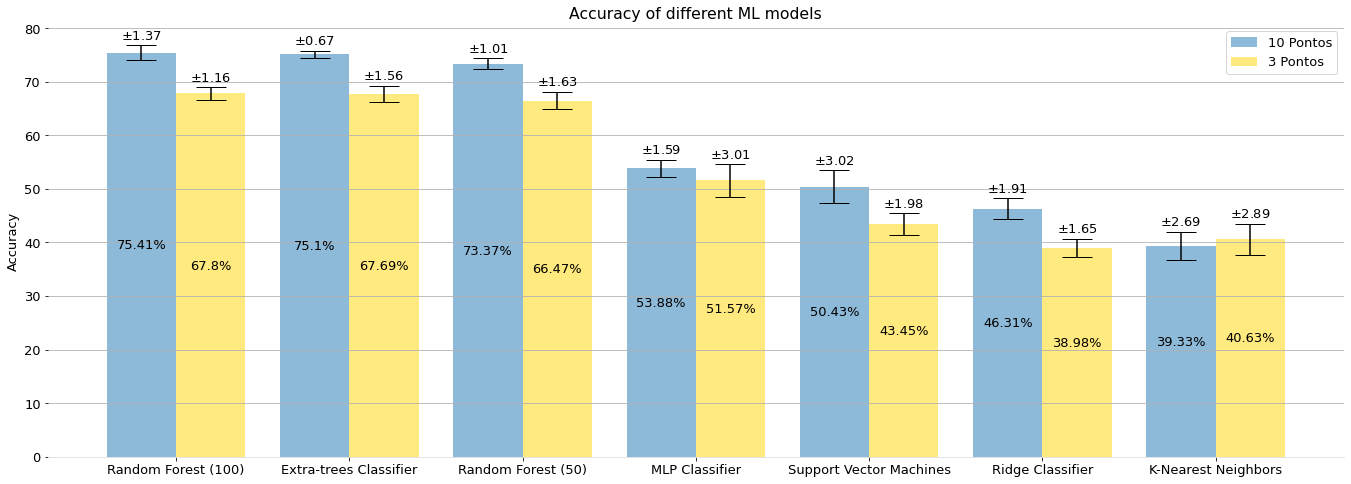

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1.5])
b1 = ax.bar(x_pos, models_accur, yerr=models_std, align='center', alpha=0.5, ecolor='black', capsize=15, width = 0.4, label = '10 Pontos')
b2 = ax.bar(x_pos + 0.4, models_accur_old, yerr=models_std_old, align='center', alpha=0.5, ecolor='black', capsize=15, color = 'gold', width = 0.4, label = '3 Pontos')
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos + 0.2)
ax.set_xticklabels(models_names)
ax.set_title('Accuracy of different ML models')
ax.yaxis.grid(True)

ax.legend()

for index,b in enumerate(b1):
   std_height = models_std[index]
   accur_height = models_accur[index]
   ax.annotate('$\pm${}'.format(std_height),
      xy=(b.get_x() + b.get_width() / 2, b.get_height() + std_height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   ax.annotate('{}%'.format(accur_height),
      xy=(b.get_x() + b.get_width() / 2, b.get_height()/2),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for index,b in enumerate(b2):
   std_height = models_std_old[index]
   accur_height = models_accur_old[index]
   ax.annotate('$\pm${}'.format(std_height),
      xy=(b.get_x() + b.get_width() / 2, b.get_height() + std_height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   ax.annotate('{}%'.format(accur_height),
      xy=(b.get_x() + b.get_width() / 2, b.get_height()/2),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Save the figure and show
plt.tight_layout()
plt.show()

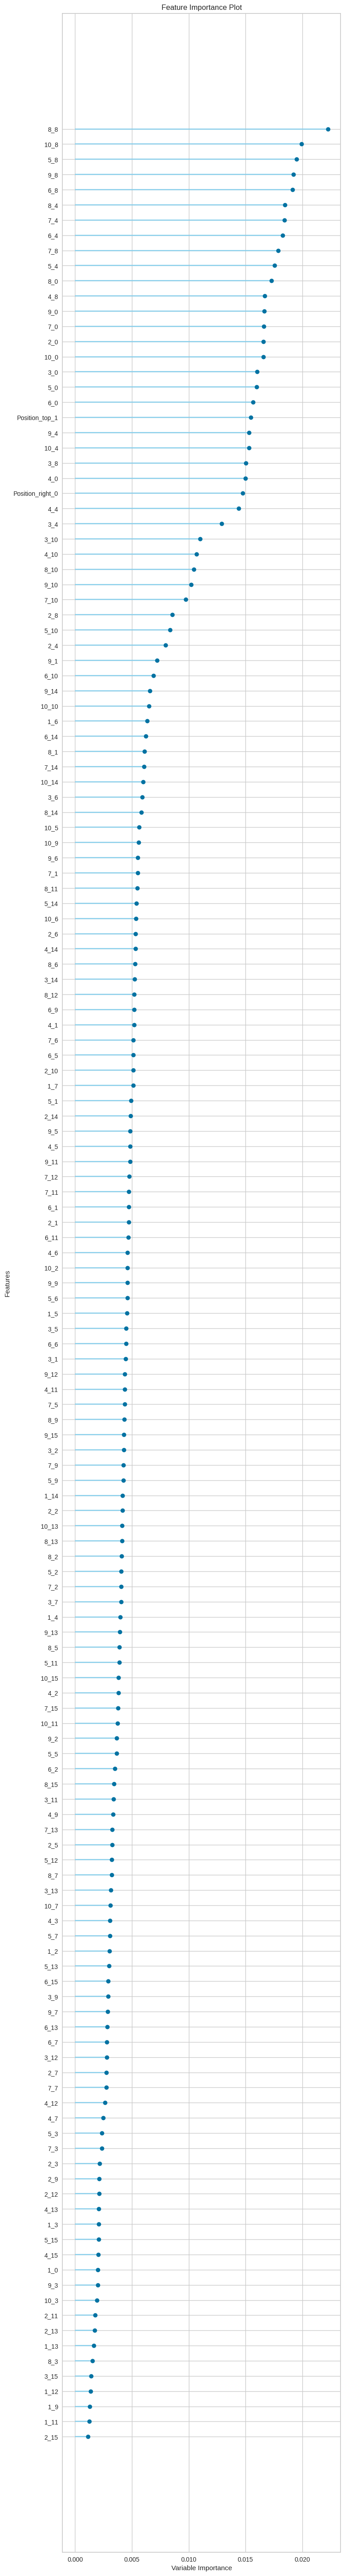

In [ ]:
dummy = setup(data=df, target='Target', feature_selection = True, feature_selection_threshold = 0.9, normalize=True)

best = compare_models()
plot_model(best, plot ='feature_all')

1.0 - 74.39

0.9 - 74,55

0.8 - 71,36

0.7 - 72.71

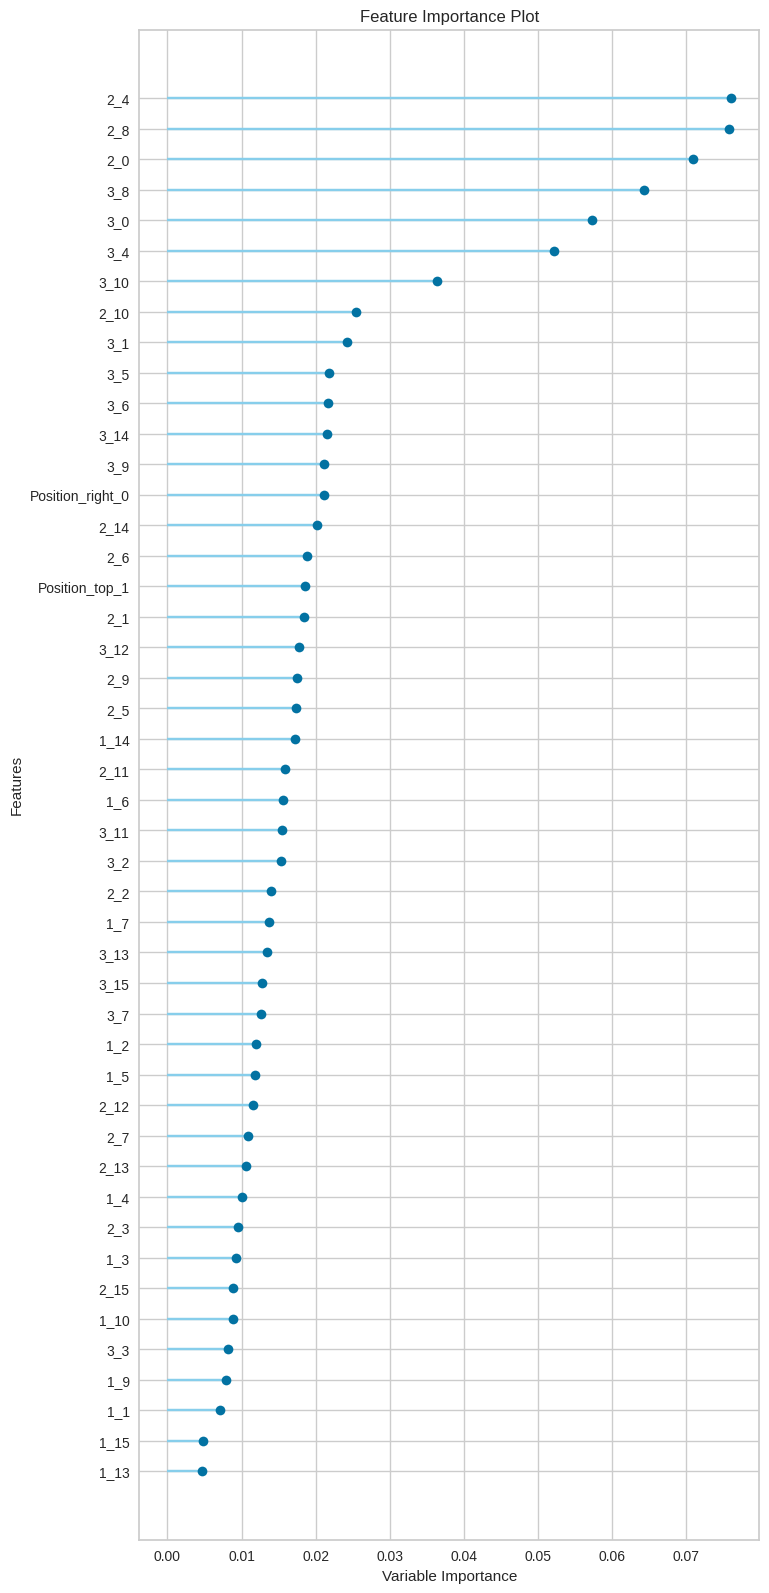

In [ ]:
dummy3 = setup(data=df_old, target='Target', feature_selection = True, feature_selection_threshold = 0.9, normalize=True)

best_3 = compare_models()
plot_model(best_3, plot ='feature_all')